# Linear Regression

There are two types of supervised machine learning algorithms: Regression and classification.
The former predicts continuous value outputs while the latter predicts discrete outputs. For
instance, predicting the price of a house in dollars is a regression problem whereas predicting
whether a tumor is malignant or benign is a classification problem.

In this tutorial, we will briefly study what linear regression is and how it can be implemented
for both two variables and multiple variables using Scikit-Learn, which is one of the most
popular machine learning libraries for Python.

#### Linear Regression Theory

The term “linearity” in algebra refers to a linear relationship between two or more variables.
If we draw this relationship in a two-dimensional space (between two variables), we get a
straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given
independent variable (x). So, this regression technique finds out a linear relationship between
x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent
variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a
straight line that best fits the data points, as shown in the figure below.

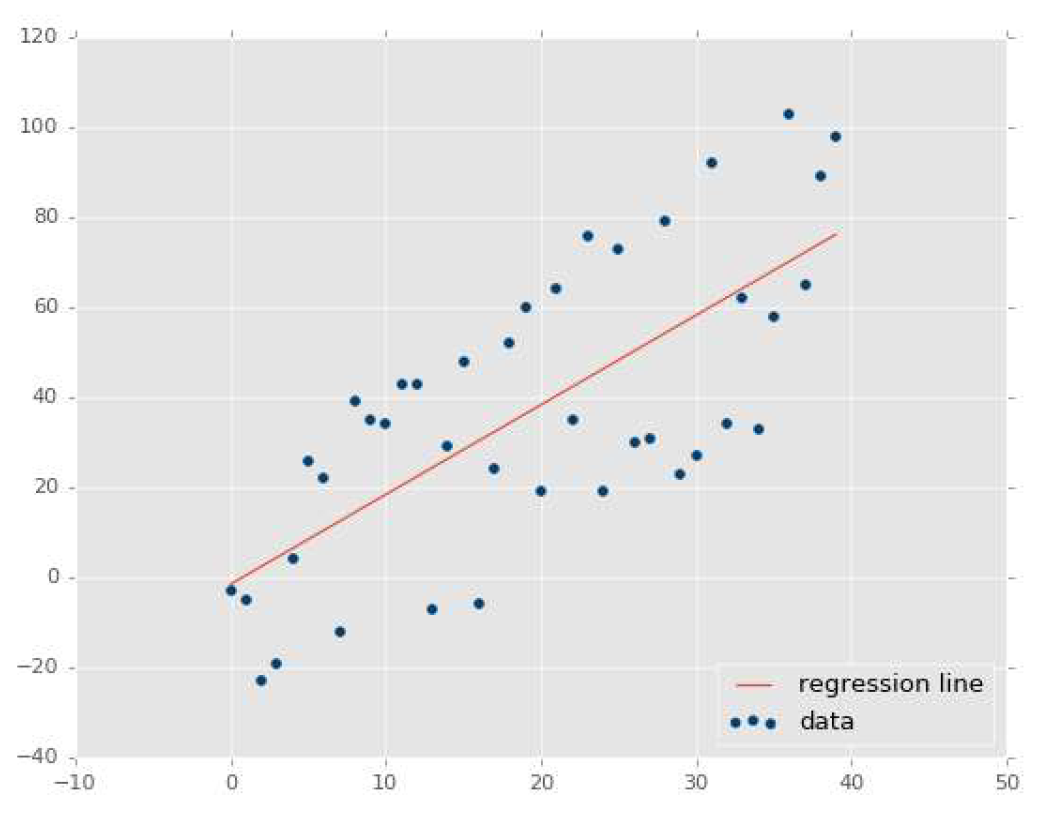

The equation of the above line is :

### y=mx+c 

Where b is the intercept and m is the slope of the line. So basically, the linear regression
algorithm gives us the most optimal value for the intercept and the slope (in two dimensions).
The y and x variables remain the same, since they are the data features and cannot be changed.
The values that we can control are the intercept(c) and slope(m).

There can be multiple straight lines depending upon the values of intercept and slope.

Basically what the linear regression algorithm does is it fits multiple lines on the data points
and returns the line that results in the least error.

This same concept can be extended to cases where there are more than two variables. This is
called multiple linear regression. For instance, consider a scenario where you have to predict
the price of the house based upon its area, number of bedrooms, the average income of the
people in the area, the age of the house, and so on. In this case, the dependent variable(target
variable) is dependent upon several independent variables. A regression model involving
multiple variables can be represented as:

### y = c0 + m1c1 + m2c2 + m3c3 + … … mncn

This is the equation of a hyperplane. Remember, a linear regression model in two dimensions
is a straight line; in three dimensions it is a plane, and in more than three dimensions, a
hyperplane.

We will now see how Python’s Scikit-Learn library for machine learning can be used to implement regression functions. 
We will start with simple linear regression involving two variables.

## Simple Linear Regression

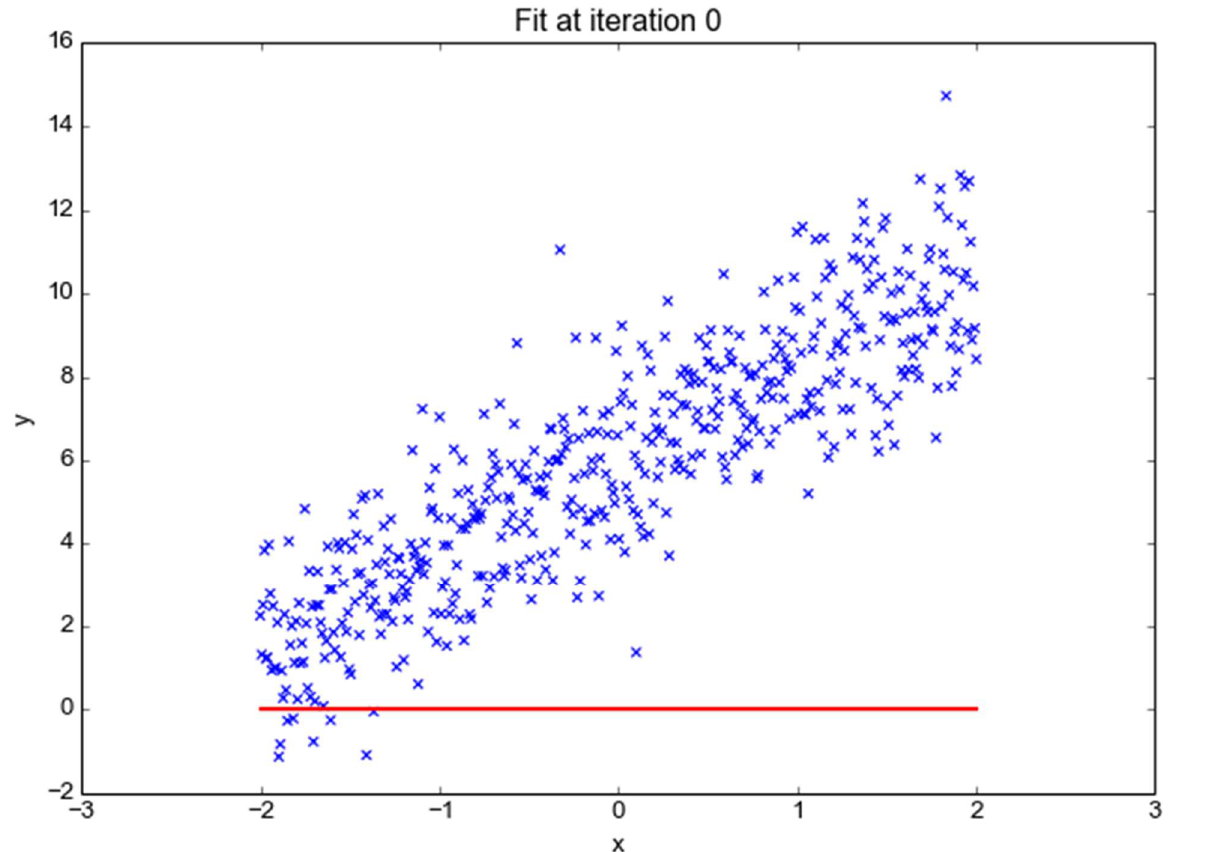

While exploring the Aerial Bombing Operations of World War Two dataset and recalling that the D-Day landings were nearly postponed due to poor weather, I downloaded these weather reports from the period to compare with missions in the bombing operations dataset.

You can download the dataset from Moodle its called Weather.csv

The dataset contains information on weather conditions recorded on each day at various
weather stations around the world. The Weather dataset includes variables such as precipitation, snowfall, temperatures,
wind speed and whether the day included thunderstorms or other poor weather conditions

### So our task is to predict the maximum temperature taking input feature as the minimum temperature.

Lets start coding!

Import all the required libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The following command imports the CSV dataset using pandas: (Ive placed the Weather Dataset in a folder called data) 

In [3]:
dataset = pd.read_csv('data/Weather.csv')

E:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dont worry if you get a warning message about mixed types (data types). We will deal with this type of thing later.

Let’s explore the data a little bit by checking the number of rows and columns in our datasets.

In [4]:
print(dataset.shape)

(119040, 31)


You should receive output as (119040, 31), which means the data contains 119040 rows and
31 columns.

To see the statistical details of the dataset, we can use describe():

In [7]:
print(dataset.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

And finally, let’s plot our data points on a 2-D graph to eyeball our dataset and see if we can
manually find any relationship between the data using the below script :

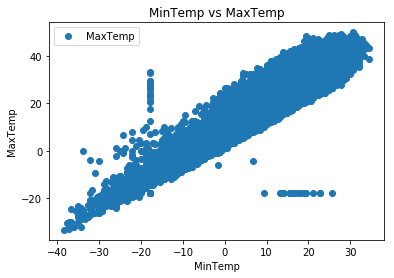

In [8]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

We have taken MinTemp and MaxTemp for doing our analysis. When you run the code above you should see a 2-D graph
between MinTemp and MaxTemp.

Let’s check the average max temperature and once we plot it we can observe that the Average
Maximum Temperature is Between Nearly 25 and 35.

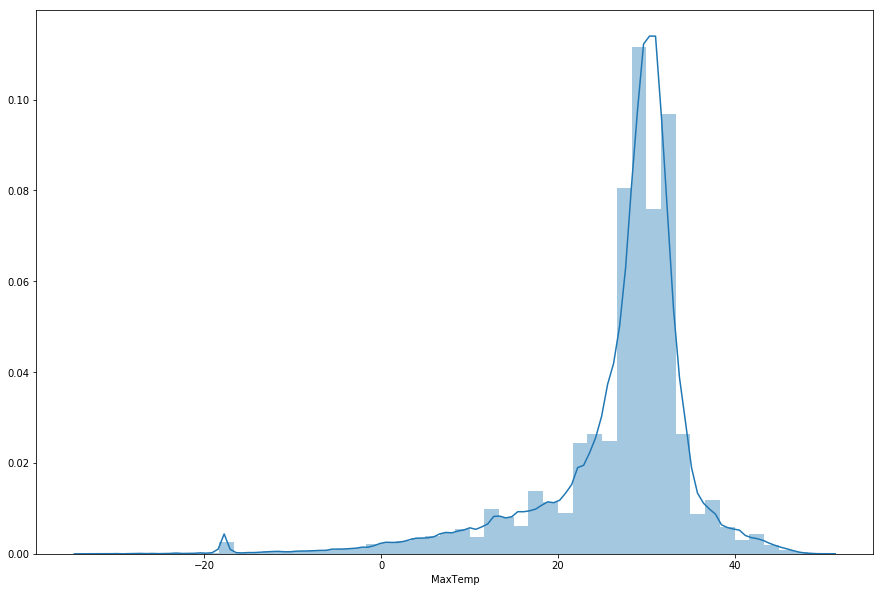

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values
are to be predicted. In our dataset, we only have two columns. We want to predict the
MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of
the “MinTemp” column which is stored in the X variable, and the label will be the
“MaxTemp” column which is stored in y variable.

In [11]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

Next, we split 80% of the data to the training set while 20% of the data to test set using below code.
The test_size variable is where we actually specify the proportion of the test set.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

After splitting the data into training and testing sets, finally, the time is to train our algorithm.
For that, we need to import LinearRegression class, instantiate it, and call the fit() method
along with our training data.

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

As we have discussed that the linear regression model basically finds the best value for the
intercept and slope, which results in a line that best fits the data. To see the value of the
intercept and slope calculated by the linear regression algorithm for our dataset, execute the
following code.

In [14]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


The result should be approximately 10.66185201 and 0.92033997 respectively.

This means that for every one unit of change in Min temperature, the change in the Max
temperature is about 0.92%.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we
will use our test data and see how accurately our algorithm predicts the percentage score. To
make predictions on the test data, execute the following script:

In [16]:
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the
following script:

In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df.head(10))

      Actual  Predicted
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852
5  37.222222  30.602551
6  22.222222  11.684452
7  35.555556  33.670351
8  30.555556  30.602551
9  28.888889  32.647751


comparison of Actual and Predicted value for the first 10 values (you can change the number of values shown by changing the number in the head() function)

We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose I’m taking just 25 records. (look at the .head() function!)

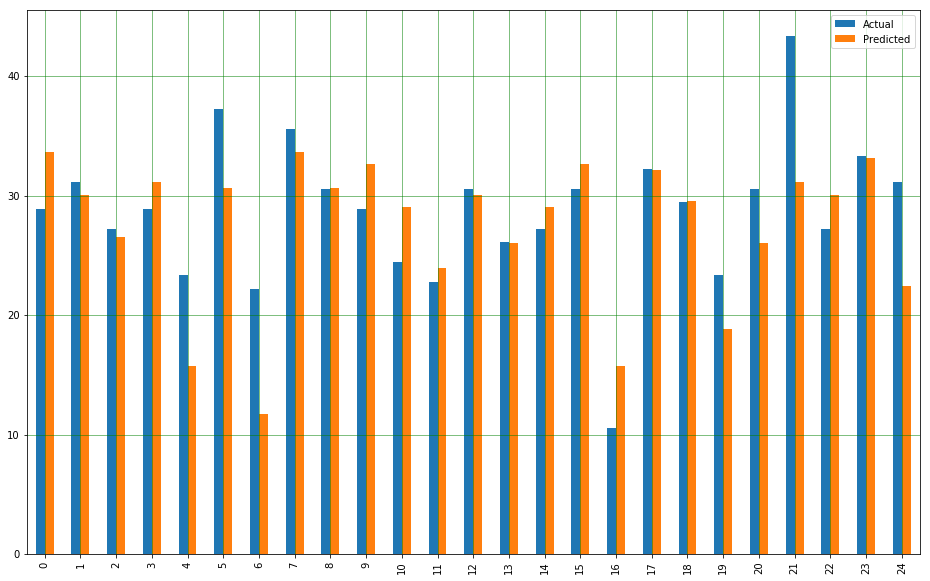

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

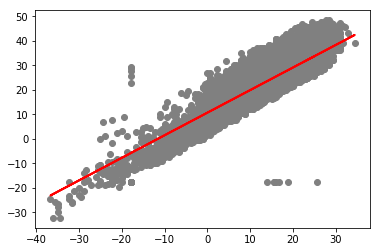

In [20]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

The final step is to evaluate the performance of the algorithm. This step is particularly
important to compare how well different algorithms perform on a particular dataset. For
regression algorithms, three evaluation metrics are commonly used:

 1. <strong>Mean Absolute Error (MAE)</strong> is the mean of the absolute value of the errors. It is calculated as:

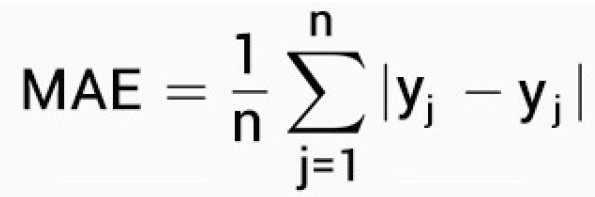

 2. <strong>Mean Squared Error (MSE)</strong> is the mean of the squared errors and is calculated as:

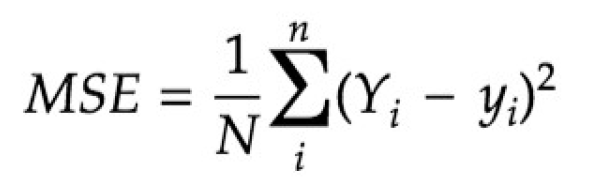

 3. <strong>Root Mean Squared Error (RMSE)</strong> is the square root of the mean of the squared errors:

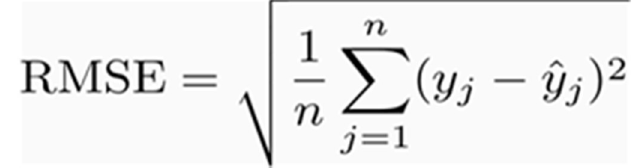

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library
comes with pre-built functions that can be used to find out these values for us.

Let’s find the values for these metrics using our test data.

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785303
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


You should receive output like this (but probably slightly different):

('Mean Absolute Error:', 3.19932917837853)<br>
('Mean Squared Error:', 17.631568097568447)<br>
('Root Mean Squared Error:', 4.198996082109204)

You can see that the value of root mean squared error is 4.19, which is more than 10% of the
mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm
was not very accurate but can still make reasonably good predictions.